In [6]:
# =============================
# Step 1: Import Libraries
# =============================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image


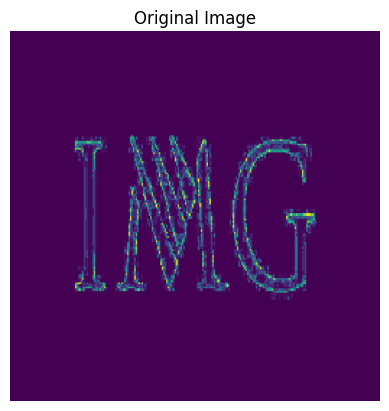

In [8]:
# =============================
# Step 2: Load Local Image
# =============================
# Replace "my_image.jpg" with your local image file path
image = Image.open("my_image.png")
# Optional: resize to speed up clustering
image = image.resize((256, 256))
image_np = np.array(image)

plt.imshow(image_np)
plt.title("Original Image")
plt.axis("off")
plt.show()


In [10]:
# =============================
# Step 3: Reshape Image for K-Means
# =============================
# Handle grayscale images
if len(image_np.shape) == 2:
    image_np = np.stack((image_np,)*3, axis=-1)

rows, cols, ch = image_np.shape
pixels = image_np.reshape(-1, 3)  # shape = (num_pixels, 3)

print("Original pixels shape:", pixels.shape)

Original pixels shape: (65536, 3)


In [11]:
# =============================
# Step 4: Apply K-Means
# =============================
k = 16  # number of colors for compression
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(pixels)

# Replace each pixel with its cluster centroid color
compressed_pixels = kmeans.cluster_centers_.astype("uint8")[labels]

In [12]:
# =============================
# Step 5: Reshape Back to Image
# =============================
compressed_image = compressed_pixels.reshape(rows, cols, ch)


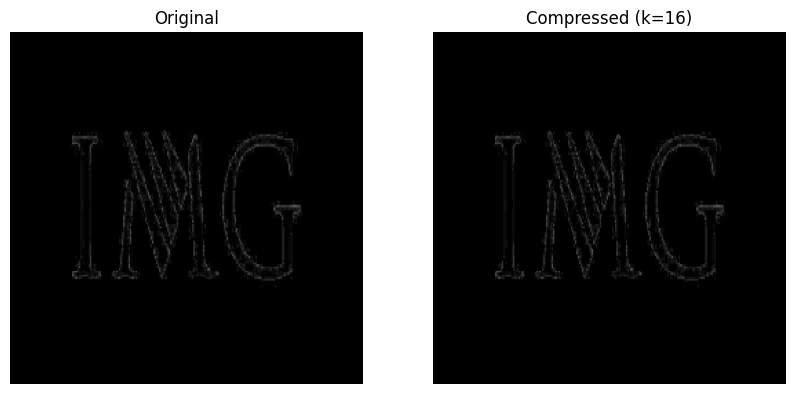

In [13]:
# =============================
# Step 6: Show Original vs Compressed
# =============================
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_np)
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(compressed_image)
plt.title(f"Compressed (k={k})")
plt.axis("off")

plt.show()

In [14]:
# =============================
# Step 7: Save Compressed Image
# =============================
compressed_pil = Image.fromarray(compressed_image)
compressed_pil.save("compressed_image.jpg")
print("Compressed image saved as 'compressed_image.jpg'")

Compressed image saved as 'compressed_image.jpg'
